___

# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into two groups, *Private* and *Public*.

___
It is **very important to note: we actually have the labels for this data set but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but we won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project don't truly make sense in a real world setting!
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* **Private**: A factor with levels No and Yes indicating private or public university
* **Apps**: Number of applications received
* **Accept**: Number of applications accepted
* **Enroll**: Number of new students enrolled
* **Top10perc**: Pct. new students from top 10% of H.S. class
* **Top25perc**: Pct. new students from top 25% of H.S. class
* **F.Undergrad**: Number of fulltime undergraduates
* **P.Undergrad**: Number of parttime undergraduates
* **Outstate**: Out-of-state tuition (It is the tuition rate students pay when attending a public college or university that's located outside their state of residence)
* **Room.Board**: Room and board costs
* **Books**: Estimated book costs
* **Personal**: Estimated personal spending
* **PhD**: Pct. of faculty with Ph.D.’s
* **Terminal**: Pct. of faculty with terminal degree
* **S.F.Ratio**: Student/faculty ratio
* **perc.alumni**: Pct. alumni who donate
* **Expend**: Instructional expenditure per student
* **Grad.Rate**: Graduation rate

## Import Libraries

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_theme()

## Get the Data

In [213]:
df = pd.read_csv('data/College_Data', index_col=0)

Let's check the head, the infos and the statistical description of the dataset, to get an idea of what we'll analyze.

In [214]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [216]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Exploratory Data Analysis

It's time to create some data visualizations!

For first let's create a scatterplot of **Grad.Rate** versus **Room.Board**, where the points are colored by the **Private** column.

In [217]:
px.scatter(df, x='Grad.Rate', y='Room.Board', color='Private')

Now we create a scatterplot of **F.Undergrad** versus **Outstate**. The points are always colored by the **Private** column.

<AxesSubplot: xlabel='Outstate', ylabel='F.Undergrad'>

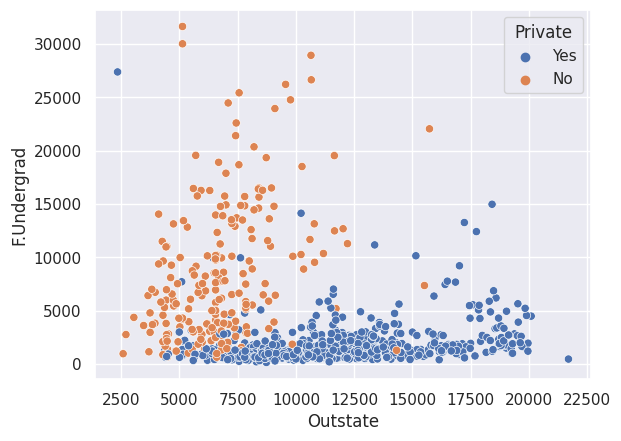

In [218]:
sns.scatterplot(df, x='Outstate', y='F.Undergrad', hue='Private')

Not much a correlation between the out-of-state tuition and the number of fulltime students.

We conclude the EDA part with a series of histogram. Let's start by showing **Out of State Tuition** based on the **Private** column.

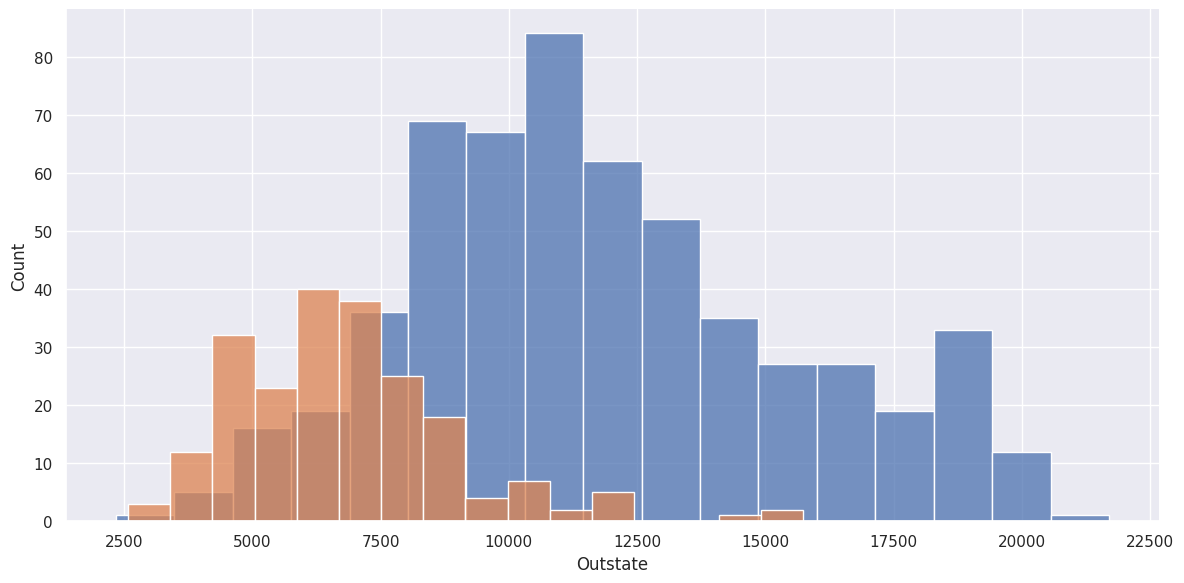

In [219]:
g = sns.FacetGrid(df, hue='Private', aspect=2, height=6)
g.map_dataframe(sns.histplot, x='Outstate')

We'll do the same for the **Grad.Rate** column.

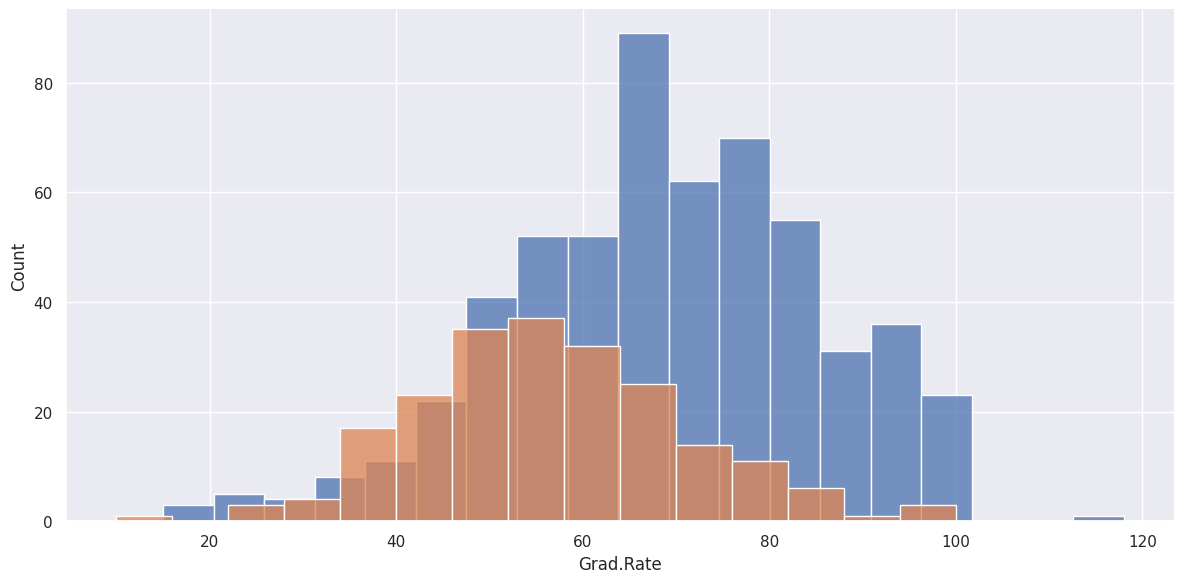

In [220]:
g = sns.FacetGrid(df, hue='Private', aspect=2, height=6)
g.map_dataframe(sns.histplot, x='Grad.Rate')

This is a particular situation: notice how there seems to be a private school with a graduation rate of higher than 100%! What is the name of that school?

In [221]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Let's set that school's graduation rate to 100 so it makes sense.

In [222]:
df['Grad.Rate'] = df['Grad.Rate'].apply(lambda v: 100 if v > 100 else v)

Now we'll show the same plot, but with the correction.

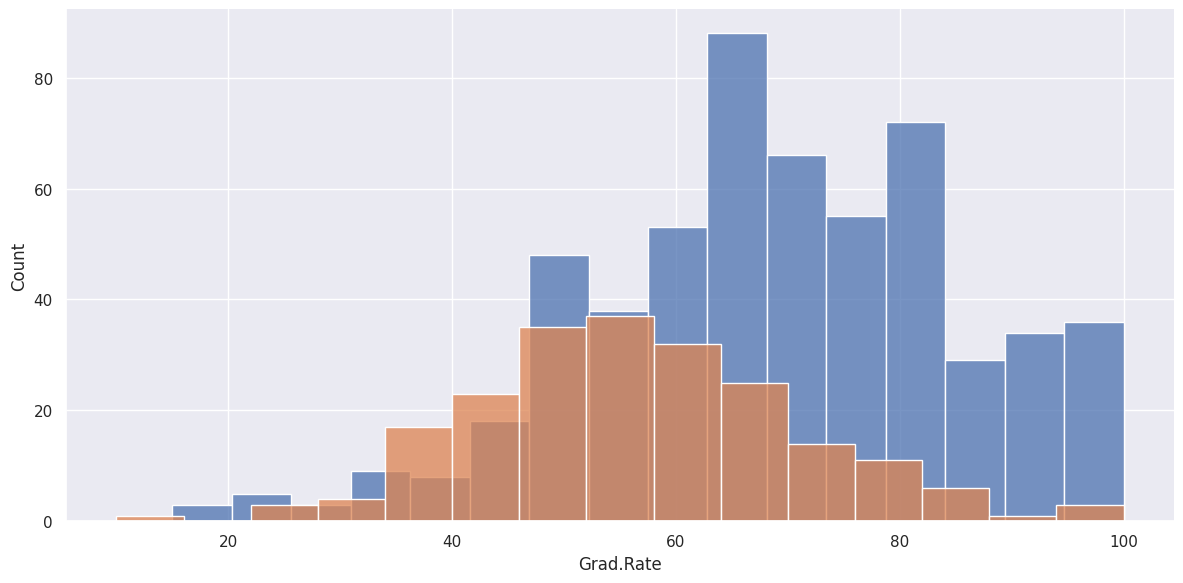

In [224]:
g = sns.FacetGrid(df, hue='Private', aspect=2, height=6)
g.map_dataframe(sns.histplot, x='Grad.Rate')

## K-Means Clustering

It's time to preprocess our data and use them to cluster Universities, thanks to the K-Means Clustering!

### Data preprocessing

Before starting with the clustering operation, let's see if something can be done to best prepare our dataset. In particular, What I'm going to do is:
1. Encoding categorical features
2. Check for null values
3. Set for all features a standard scale.

#### Encoding categorical features

The only non-numerical variable here is the label feature 'Private'. Since It will be used to measure our model performance, we convert in a numerical value, in a way that:
- 1 = "Yes"
- 0 = "No"

In [225]:
df['Private'] = df['Private'].apply(lambda v: 1 if v == 'Yes' else 0)

#### Check for null values

In [226]:
# we count the null values for every column, and then we sum
# the results of each feature
df.isna().sum().sum()

0

No null values to be filled or removed. So farm so good. 

#### Data Standardization

To set all the features on a standard scale, we will use the scikit-learn **StandardScaler** object.

In [227]:
from sklearn.preprocessing import StandardScaler

features = StandardScaler().fit_transform(df.drop('Private', axis=1))
features_df = pd.DataFrame(data=features, columns=df.columns.drop('Private'))

### K Means Cluster Creation

Now it is time to create the Cluster labels!

In [228]:
from sklearn.cluster import KMeans

First of all, we create an instance of a K Means model with 2 clusters.

In [229]:
kmeans = KMeans(n_clusters=2)

Now we fit the model to all the data except for the Private label.

In [230]:
kmeans.fit(features_df)

KMeans(n_clusters=2)

Clusters created! Before seeing the results, we'll have a quick view of the cluster center vectors.

In [231]:
kmeans.cluster_centers_

array([[-0.32661962, -0.30530339, -0.25143507, -0.49913749, -0.50267293,
        -0.22105053, -0.03848678, -0.45792911, -0.37283453, -0.12172587,
         0.04875211, -0.49062908, -0.47906195,  0.23583839, -0.30713916,
        -0.42464126, -0.36177249],
       [ 0.54548844,  0.50988814,  0.41992248,  0.83361106,  0.83951561,
         0.36917718,  0.06427689,  0.76478882,  0.6226721 ,  0.20329475,
        -0.08142105,  0.81940114,  0.80008284, -0.39387442,  0.51295406,
         0.70919469,  0.60419735]])

### Evaluation

There is no perfect way to evaluate clustering if you don't have the labels. However, since this is an exercise project we do have the labels: we take advantage of this to evaluate our clusters. To do this in the original dataset we add a column named **Cluster**, which contains the label based on the k-means fit.

In [232]:
df['Cluster'] = kmeans.labels_

In [233]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


Finally, let's create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [234]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df['Private'], df['Cluster']))
print(classification_report(df['Private'], df['Cluster']))

[[146  66]
 [340 225]]
              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups!